# <center> World Happiness Analysis: Linear Regression Analysis </center>

## Table of Contents
01. Importing Libraries & Data
02. Data Cleaning 
03. Data Preparation
04. Linear Regression Analysis

## 1. Importing Libraries & Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = r'C:\Users\thang\Desktop\Data Analytics\Data Analytics Immersion\Final Project\World Happiness Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '2. Data', 'Edited', 'World_Happiness_Data_Viz.pkl'))

In [5]:
df.head()

,Country,Happiness Rank,Happiness Score,GDP,Life Expectancy,Freedom,Generosity,Corruption,Year,GDP_Category
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2015,High GDP
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2015,High GDP
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2015,High GDP
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2015,High GDP
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2015,High GDP


In [6]:
df.shape

(781, 10)

## 2. Data Cleaning

### Missing Value Check

In [7]:
# Check for missing values

df.isnull().sum()

Country            0
Happiness Rank     0
Happiness Score    0
GDP                0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         0
Year               0
GDP_Category       0
dtype: int64

### Duplicate Values Check

In [8]:
df[df.duplicated()]

,Country,Happiness Rank,Happiness Score,GDP,Life Expectancy,Freedom,Generosity,Corruption,Year,GDP_Category


### Extreme Values Check

c:\Users\thang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

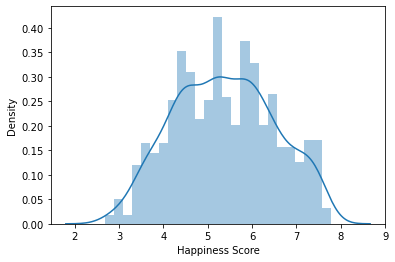

In [9]:
sns.distplot(df['Happiness Score'], bins=25) 

In [10]:
# Check the mean
df['Happiness Score'].mean() 

5.377231754346934

In [11]:
# Check the median
df['Happiness Score'].median() 

5.321

In [12]:
# Check the max
df['Happiness Score'].max() 

7.769

### Hypothesis
If GDP increases, then Happiness Score will increase in a linear fashion. 

## 3. Data Preparation

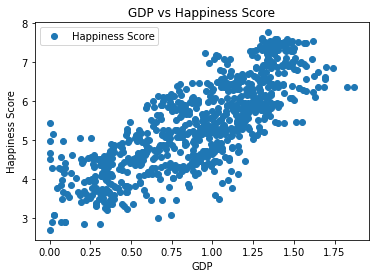

In [13]:
# Create a scatterplot to examine the relationship between two variables

df.plot(x = 'GDP', y='Happiness Score',style='o') 
plt.title('GDP vs Happiness Score')  
plt.xlabel('GDP')  
plt.ylabel('Happiness Score')  
plt.show()

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['GDP'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [15]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [16]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Linear Regression Analysis

In [18]:
# Create a regression object.

regression = LinearRegression()  

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
y_predicted = regression.predict(X_test)

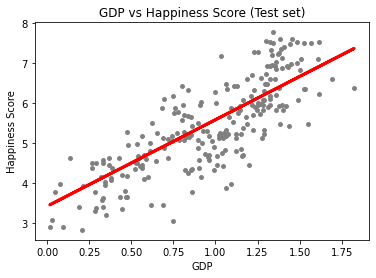

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP vs Happiness Score (Test set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Happiness Score')
plot_test.show()

The line appears to fit the data well because most of the data points are relatively close to the regression line. 

In [22]:
# Check the model performance statistics - MSE & R2

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.1559553]]
Mean squared error:  0.4802961891151823
R2 score:  0.6330759591283834


In [24]:
y_predicted

array([[5.80656382],
       [6.44515118],
       [6.73108163],
       [6.43762689],
       [4.04600412],
       [5.92529237],
       [4.26116846],
       [5.02733029],
       [6.50420279],
       [5.98914507],
       [5.72001717],
       [5.94264111],
       [4.67726783],
       [4.97263371],
       [3.46411178],
       [6.36210378],
       [4.45774952],
       [5.37277198],
       [5.8478222 ],
       [5.28028684],
       [7.36417024],
       [3.5885104 ],
       [4.66864401],
       [6.36753679],
       [7.07559563],
       [6.15409721],
       [5.0502481 ],
       [6.41281185],
       [4.36052653],
       [6.35460105],
       [6.40418803],
       [6.53138939],
       [5.90450227],
       [3.84291313],
       [6.39772016],
       [5.60864052],
       [3.4871805 ],
       [5.68075722],
       [6.21492839],
       [6.04377698],
       [4.14310834],
       [6.43882694],
       [5.03731236],
       [5.71855112],
       [6.29854622],
       [6.12645786],
       [5.3973569 ],
       [5.182

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806564
1,6.886,6.445151
2,6.344,6.731082
3,7.119,6.437627
4,3.781,4.046004
5,4.692,5.925292
6,4.390,4.261168
7,5.061,5.027330
8,6.929,6.504203
9,5.488,5.989145


The model performed well on the test set because the data points are very close to the actual data. The R2 score also indicates a strong positive relationship betwee the two variables. 

### Compare how the regression fits the training set

In [26]:
y_predicted_train = regression.predict(X_train) 

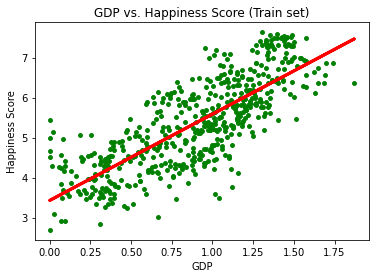

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP vs. Happiness Score (Train set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.1559553]]
Mean squared error:  0.4775333894187696
R2 score:  0.6181979086572386


In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)

,Actual,Predicted
0,5.611,6.278882
1,3.802,4.485388
2,4.643,4.599158
3,5.919,6.081722
4,7.504,6.623304
5,7.334,6.364648
6,6.310,6.128226
7,6.481,5.652450
8,6.442,6.516133
9,2.853,4.090848


The model performed well on the train set because the data points are close to the regression line similar to the test set. The R2 score also indicates moderately strong positive relationship, and the predicted values are close to the actual data. However, train set did a little bit worse than the test set in terms of R2 score. 
